# Telecommunication company customer Churn Prediction



## Problem Description
Customer churn is a term used when a customer decides to stop using the services of a business. Businesses do customer churn analysis most of the time because it helps them to know or learn which customers are about to leave.

The aim of this project is to train a machine learning model on the available data that will predict with high accuracy which customers are about to churn, which will in turn help the business owner in making useful marketing decisions

## Data Overview

The training dataset contains 7032 samples. Each sample contains 21 features and 1 Boolean variable “churn” which indicates the class of the sample. The 20 input features and 1 target variable are:

	
1. customerID - unique value identifying customer
2. gender - whether the customer is a male or a female
3. SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
4. Partner - whether the customer has a partner or not (Yes, No)
5. Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
6. tenure - number of months the customer has stayed with the company
7. PhoneService - whether the customer has a phone service or not (Yes, No)
8. MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService - customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
13.	TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
14.	StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
15.	StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
16.	Contract - type of contract according to duration (Month-to-month, One year, Two year)
17.	PaperlessBilling - bills issued in paperless form (Yes, No)
18.	PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
19.	MonthlyCharges - amount of charge for service on monthly bases
20.	TotalCharges - cumulative charges for service during subscription (tenure) period
21.	 Churn  - variable we are trying to predict or estimate



## Metric of Success

* High Accuracy is needed
* Since we are dealing with an imbalanced dataset,we will keep track of the Recall and confusion matrix

* **Accuracy** = Number of correctly predited test samples/Total number of test sample


* **Recall** = True Positives/ (True positive + False negatives)



## Part 1: Necessary Library Imports and Loading the Data



In [150]:
#import the necessary libraries for data manipulation,visualization and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import tree
from xgboost import XGBClassifier

In [51]:
#load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [52]:
#check the first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 2: Data Understanding

**Check the general structure of the dataframe.**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [54]:
#we can see from the dataset that most columns are of object datatype with only a few (4) being in float and integer. 
#This is an indication that we will need to perform encoding on categorical columns

In [55]:
#check the shape of the dataset
df.shape

(7032, 21)

In [56]:
#Our data has 7032 rows and 21 columns

**Get a statistical summary of the numeric columns with .describe()**

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [58]:
#Most of the columns are in object data type so we cant really get alot of insight from this statistical summary

# Part 3:  Exploratory Data Analysis

## General Feature Exploration

**Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [59]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
#Our data doesnt contain any null values

**check for duplicate values based off of the CustomerID column**

In [61]:
df.duplicated(subset=['customerID']).sum()

0

In [62]:
#Our data set doesnt contain duplicte values

**check for class imbalance on the target variable(churn) with a Count Plot and values counts.**

In [63]:
df['Churn'].value_counts(normalize=True)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

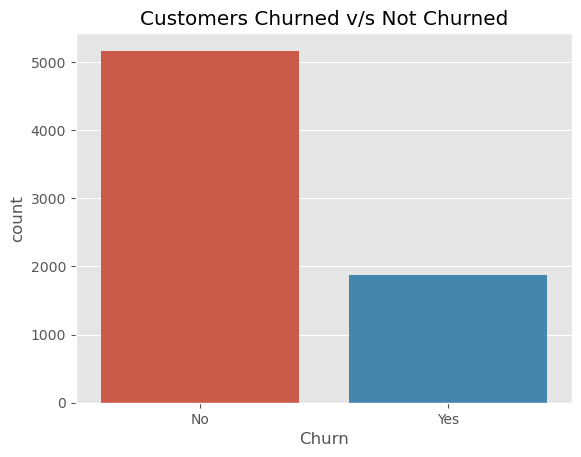

In [64]:
sns.countplot(data=df, x='Churn')
plt.title('Customers Churned v/s Not Churned');

In [65]:
#we notice a class imbalance between the two classes where No is about 73.42% of the dataset and the True class is 26.58%. 
#For now we will proceed without balancing.

**Explore the distrbution of TotalCharges between Churn categories with a boxplot.**

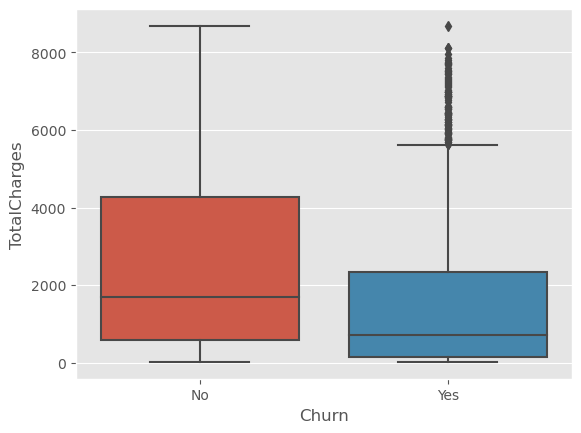

In [66]:
sns.boxplot(data=df, x='Churn', y='TotalCharges');

In [67]:
#we notice that the 'yes' churn class has some outliers, with an vaerage total charges of about 1000, 
#while the 'No' class has no outliers with an average total charge of about 1800

**Boxplot showing the distribution of TotalCharges per Contract type, with a hue coloring based on the Churn class.**

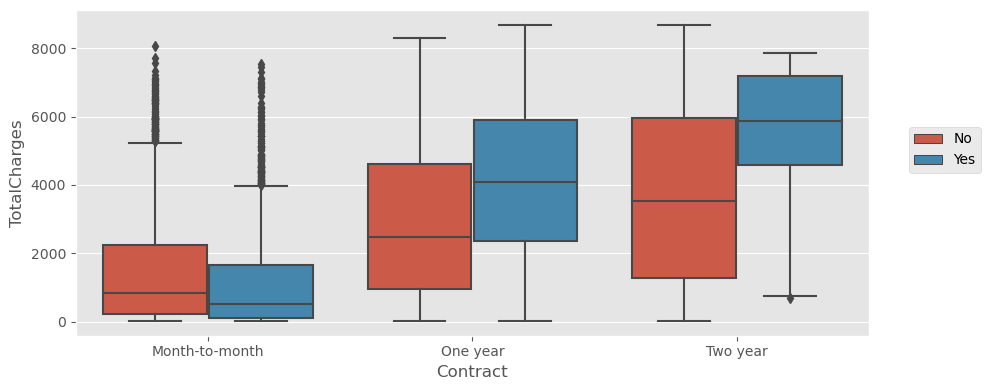

In [68]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn');
plt.legend(loc=(1.05,0.5));
plt.tight_layout()

In [69]:
#from the above plot, we see that there is very little difference in terms of charges for the people with Month-to-Month Contarct
#there is however a noticeable difference for the people with contracts of one or two years. The people who chhurn out are charged highly

## check the distribution of InternetService with a hue of churn

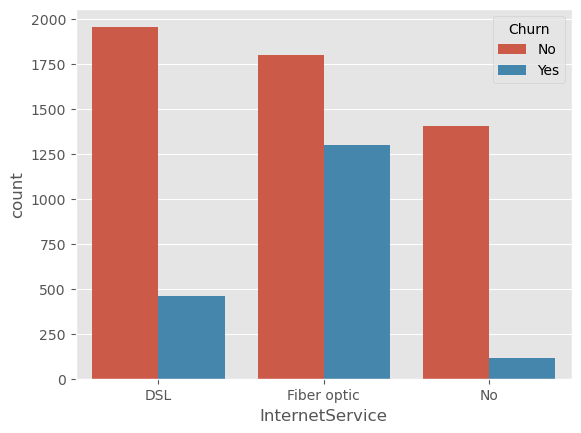

In [70]:
df['InternetService'].value_counts()
sns.countplot(data=df, x='InternetService', hue='Churn');

In [71]:
#its noted that most people who churn out use Fibre Optic Internet service

## check the churn pattern for Internet service in relation to contract type
Does A company's tech support influence customer retention?

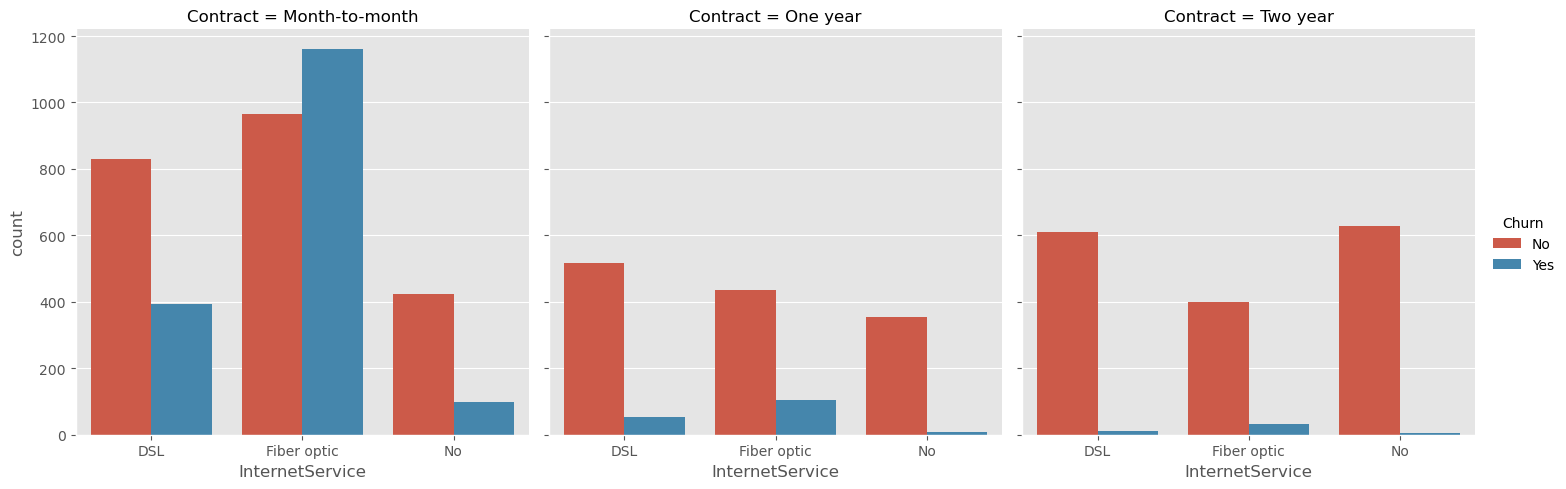

In [72]:
sns.catplot(data=df, x = 'InternetService', hue='Churn', kind='count', 
           col='Contract');

In [73]:
#its noted that customers who use the internet service of type fibre optic and on month to month contract have a quite high churning rate compared to 
#DSL and those who do not use the internet.
#Generally most customers who use intrernet service are on month-to-month contract


## check the distribution of TechSupport with a hue of churn
Does a company's tech support influence customer retention?

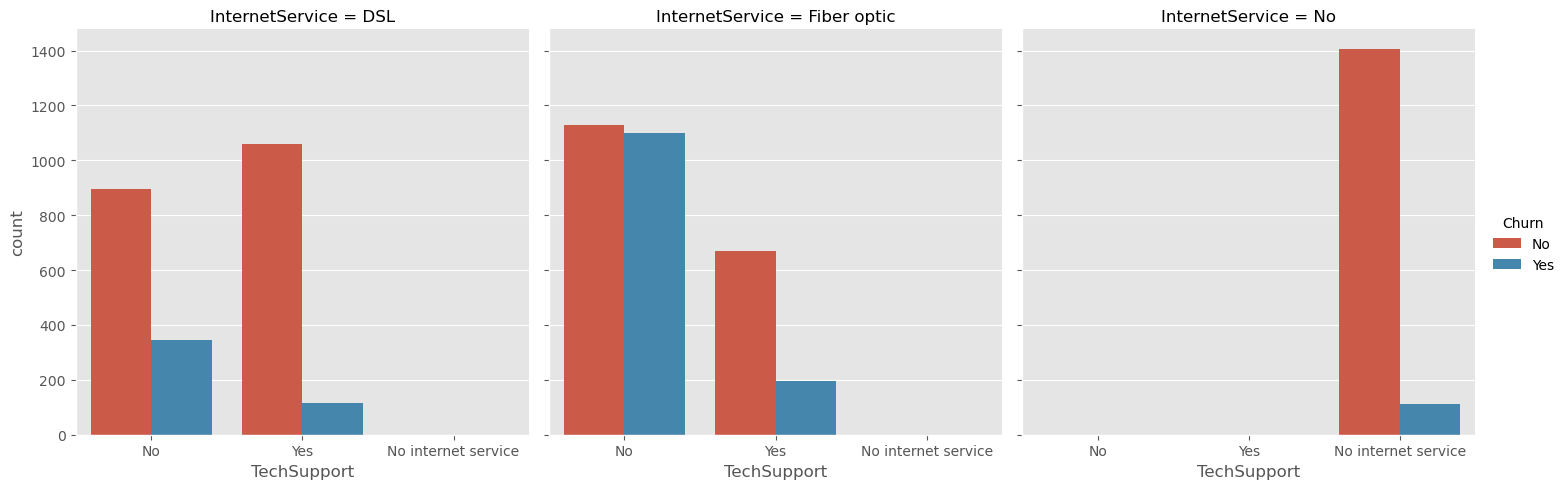

In [74]:
sns.catplot(data=df, x = 'TechSupport', hue='Churn', kind='count', 
           col='InternetService');

In [75]:
#we notice that customers who have subscribed to Internet service(Fibre Optic) and do not receive techsupport tend to churn more that those who
#receive the techsupport

**Check citizen Seniority in relation to churning**

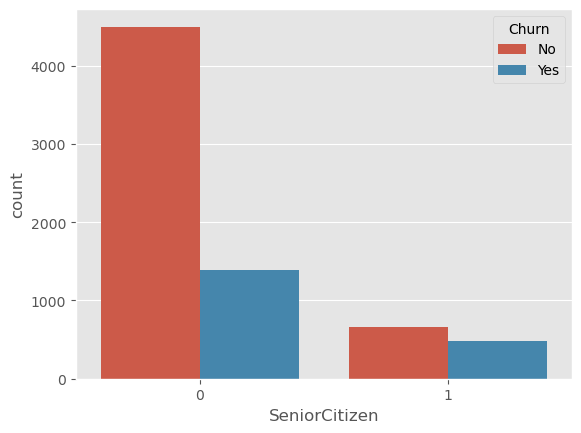

In [76]:
df['SeniorCitizen'].value_counts()
sns.countplot(data=df, x='SeniorCitizen', hue='Churn');

In [77]:
#most people who churn out of the service are not senior citizens

## check the distribution of OnlineSecurity with a hue of churn

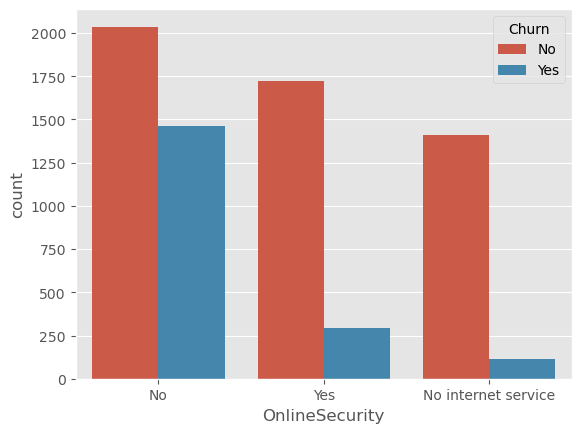

In [78]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn');

In [79]:
#we notice that customers who are not guaranteed of online security tend to churn out more

**Check for correlation of predictor features to the class label by plotting barplot. For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**    


In [80]:
#first convert the categorical columns to numeric using pandas get_dummies method, then call a .corr() method on it
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [81]:
#inspect the created correlation
corr_df


,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [82]:
#pick only values where the correlation to churn is equal to yes and where there correlation is not 1
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
corr_yes_churn

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

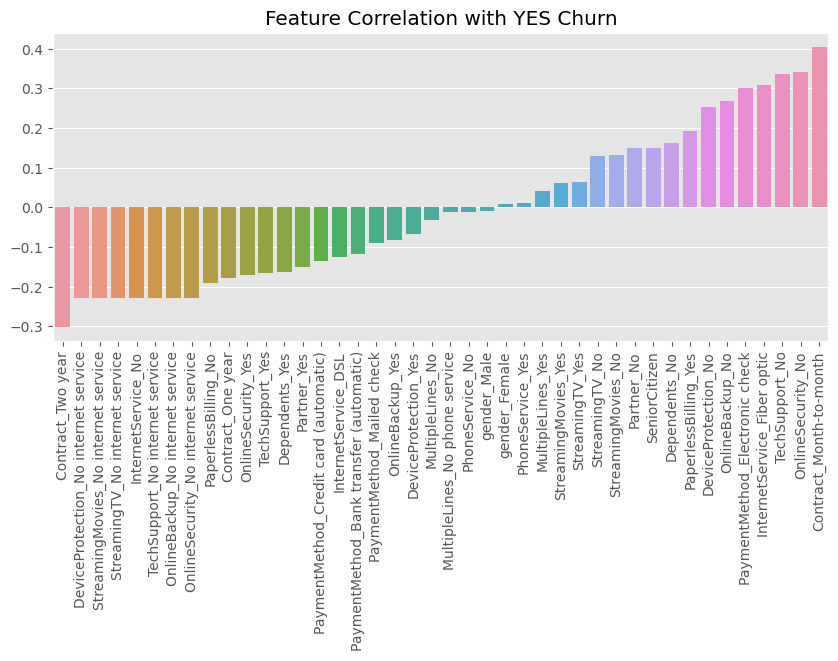

In [83]:
#plot a bar plot on the series created above
plt.figure(figsize=(10,4))
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title("Feature Correlation with YES Churn")
plt.xticks(rotation=90);

**Check the number of contract types available**

In [84]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [85]:
#we see that we have 3 types of contracts-'Month-to-month', 'One year' and  'Two year'

In [86]:
#check the tenure types that we have
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

**A histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been a customer.**

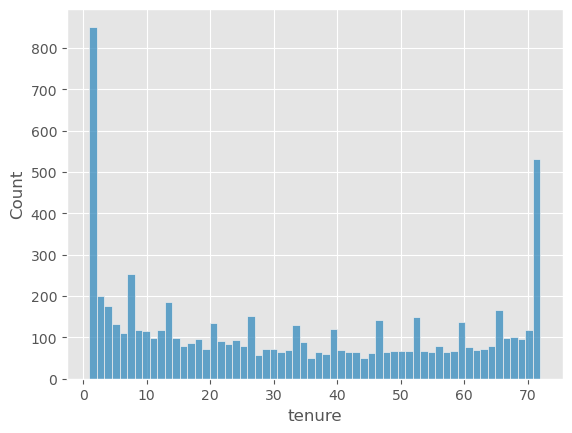

In [87]:
sns.histplot(data=df, x='tenure', bins=60);

In [88]:
#most customers stay on for one to 2 months
# We also have many customesrs who have stayed for more than 70 months
#Other customers are just in between 10-65 months

**A histogram showing the number of Churns(Yes or No) based on the Contract type.**

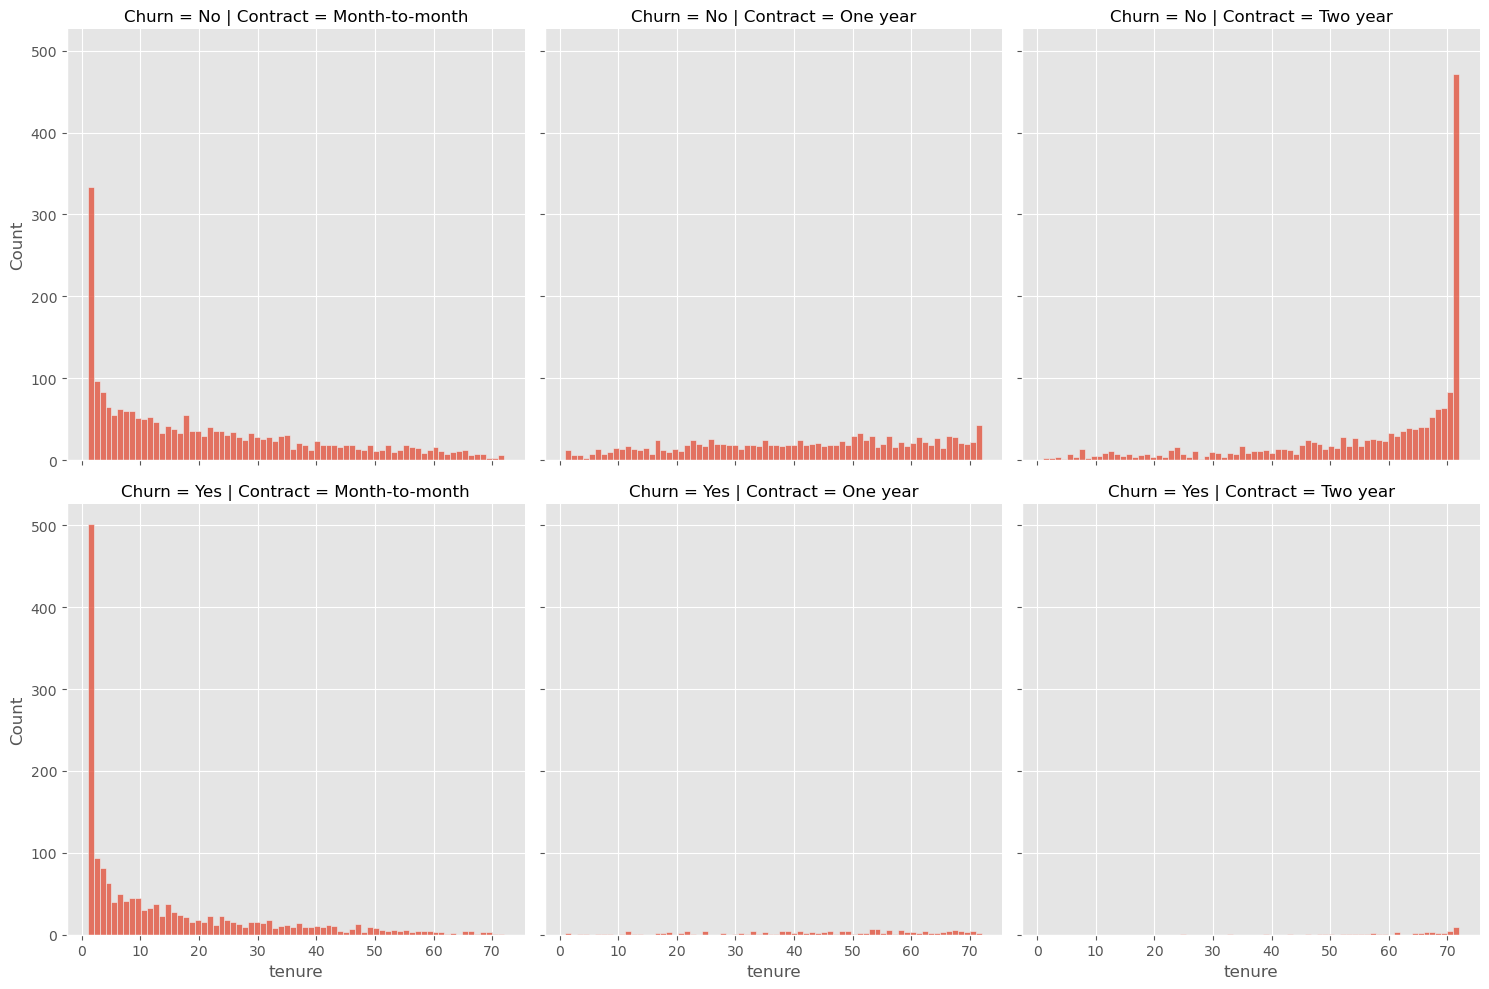

In [89]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn');

In [90]:
#from the above plot, we see that most people who churn out are on month to Month contract compared to those on 1 or 2 years
#maybe we could ask the company to look for ways of encouraging people on month-to-month contract to stay longer
# We also notice that there are people who have stayed for more than 10 months and are still on Month-to-month contract
#could this be because of higher charges?

**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

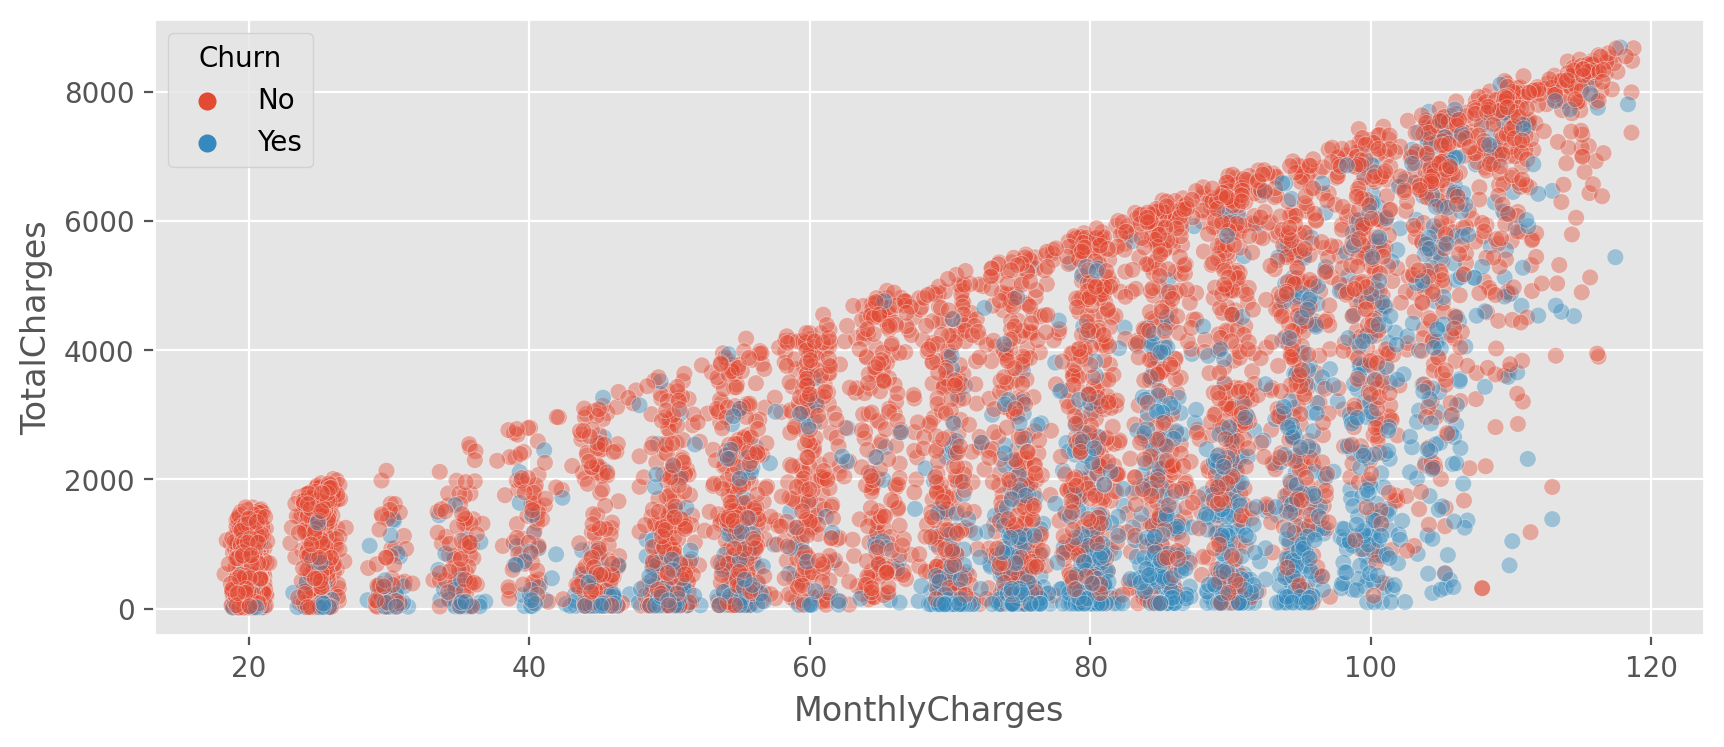

In [91]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn',
               alpha=0.4, linewidth=0.3);

In [92]:
#We can see that a lot of people tend to churn when their Monthly charges are higher
#even though there isnt match of total charges


### Get the percentage churn (churn rate) based on the tenure
**We will begin by grouping the data by churn and tenure then calculate the percentage by dividing the yes churn group bt the
total of yes churn and no churn the multiply by 100**

In [93]:
#get the yes churn group based on the count 
#transpose the dataframe for easy reading and grabbing the yes class
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [94]:
#get the no churn group 
#transpose the dataframe for easy reading and grabbing the no class
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
no_churn 

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [95]:
#calculate the percentage of people that churned
churn_rate = 100 * yes_churn/(yes_churn + no_churn)
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


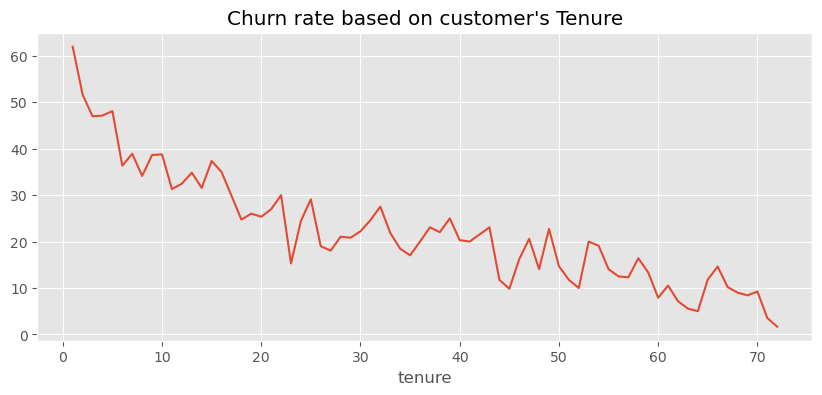

In [96]:
#transpose the churn_rate for readability, and easy feature selection
#check the churn rate base of off customer id
#then plot the churn rate
churn_rate.transpose()['customerID'].plot(figsize=(10,4))
plt.title("Churn rate based on customer's Tenure");


# Part 3: Feature Engineering

### Create broader sections that groups the tenure of a  customer into below units  and assign it to a new column Tenure Cohort
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'     

In [161]:
#create a funtion for grouping people's tenures
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    else:
        return '24-48 Months'
           

In [98]:
#create a new column based on the tenure column
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [99]:
#preview the df[Tenure cohort]
df['Tenure Cohort']

0        0-12 Months
1       24-48 Months
2        0-12 Months
3       24-48 Months
4        0-12 Months
            ...     
7027    12-24 Months
7028            None
7029     0-12 Months
7030     0-12 Months
7031            None
Name: Tenure Cohort, Length: 7032, dtype: object

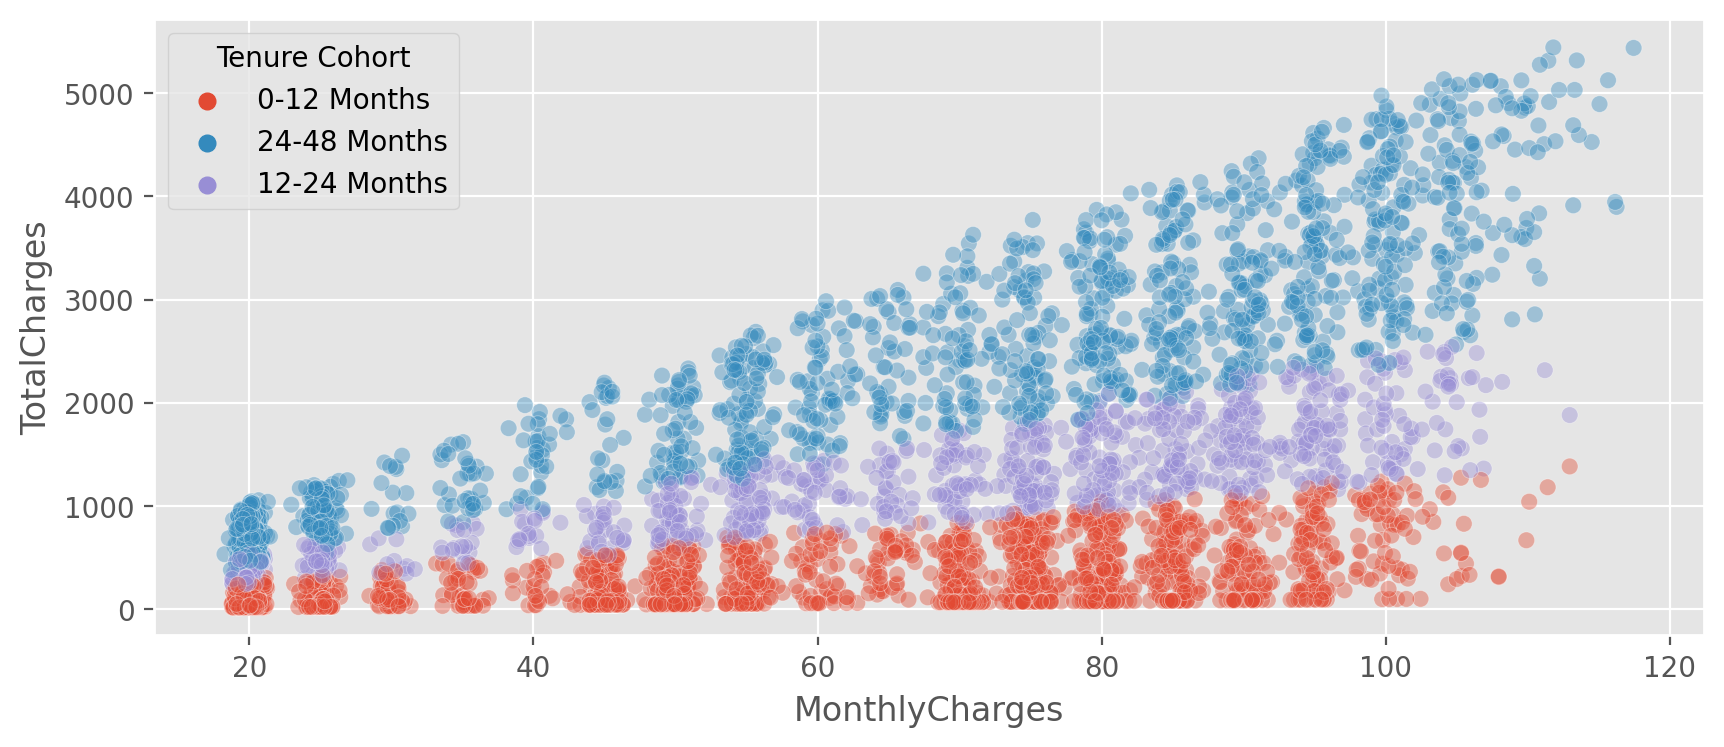

In [100]:
#didplay a scatter plot of the monthly charges agaisnt total charges with a hue of  Tenure Cohort
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort',
               alpha=0.4, linewidth=0.3);

In [101]:
#we can clearly see that the total charges are highest for the people who stay for more than 24 months, 
#followed by people who stay between 12-24 moths 
#and lowest for people who stay less than 12 months

**A count plot showing the churn count per cohort.**

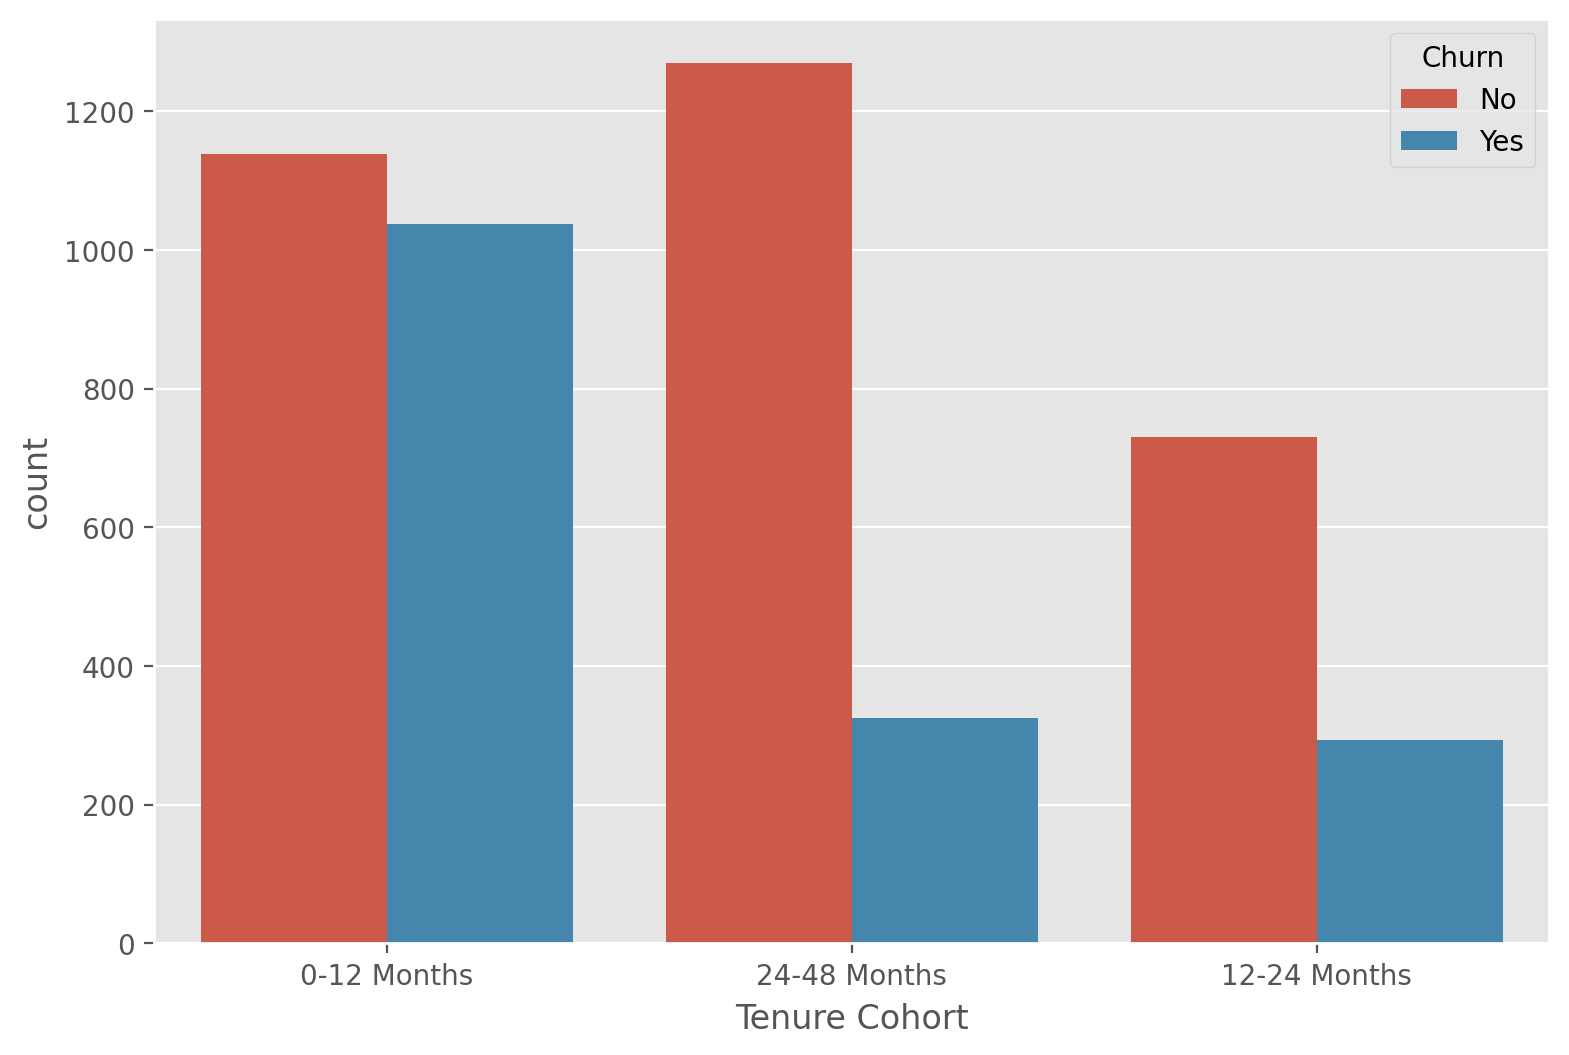

In [102]:
plt.figure(figsize=(9,6), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

In [103]:
#its claer that most people who have stayed on the service for long are not likely to churn

**A grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

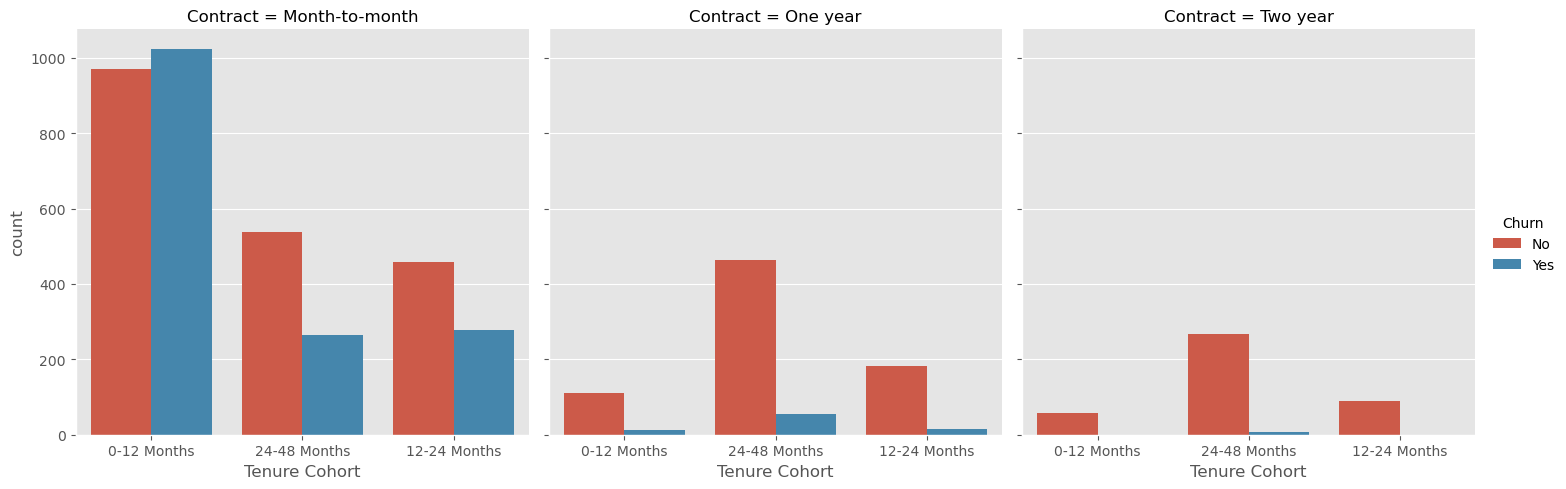

In [104]:
sns.catplot(data=df, x = 'Tenure Cohort', hue='Churn', kind='count', 
           col='Contract');

In [105]:
# The Month-to Month contract has a high churn number across all the the tenure cohort

## Data Preprocessing
**Here we look at separating features and the label column and converting categorical features into numerical**


In [106]:
#Separate out the data into X features and Y label and the CustomerID sinec it wont be useful in modeling
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [107]:
#convert the target variable from object to numeric using a label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [108]:
#get numeric dummy variable for X
X = pd.get_dummies(X, drop_first=True)

**Check for correlation of predictor features to the class label by plotting barplot. For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**    

<AxesSubplot:>

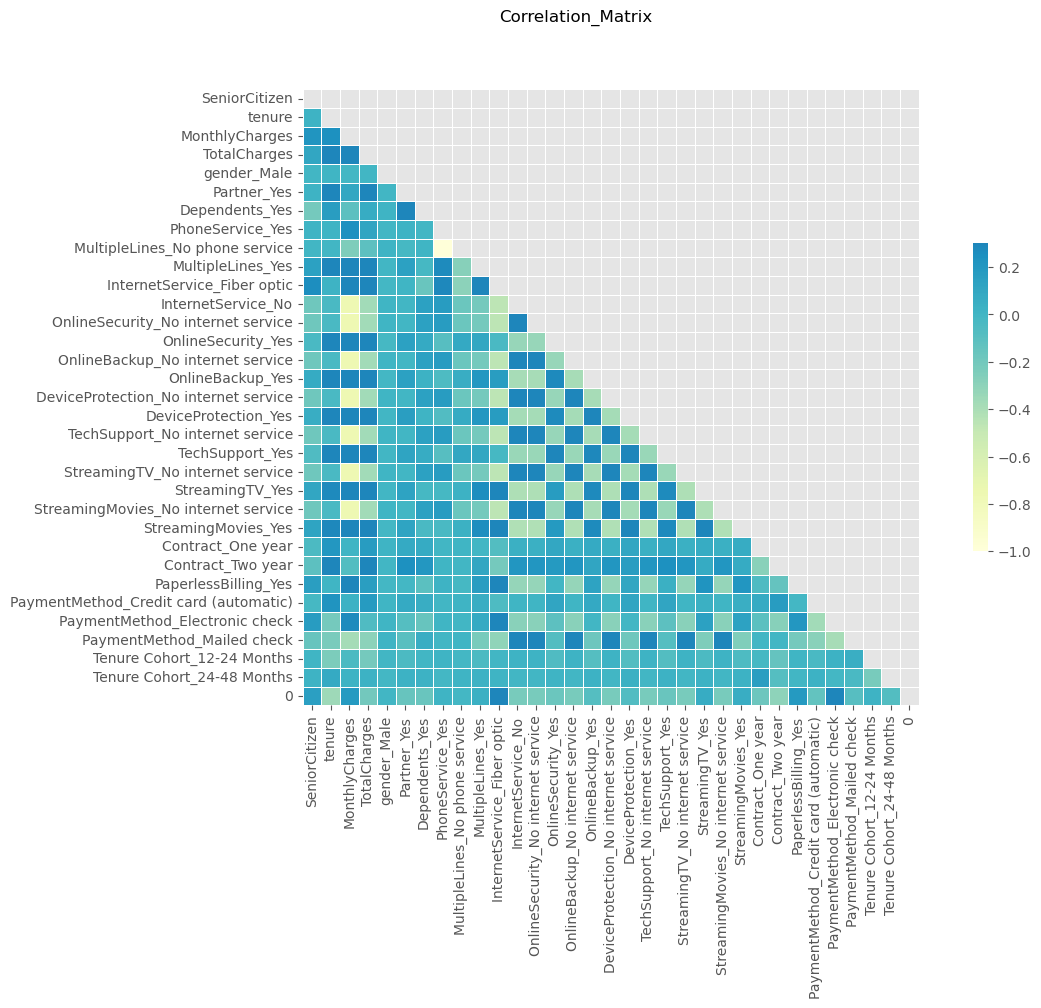

In [171]:
#first convert y into a pandas series
y = pd.Series(y)
#combine x and y
corr_matrix = pd.concat([X, y], axis = 1)
#create a correlation
corr_matrix  = corr_matrix.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


In [109]:
#create a train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



# Part 4: Predictive Modeling

**We wil explore 1 Logistic Regression and 5 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## 4.1 Baseline Model: Logistic Regression

In [110]:
#instantiate a decision tree classifier
lg = LogisticRegression()


In [111]:
#fit the model on the training data
lg.fit(X_train, y_train)

LogisticRegression()

In [112]:
#make predictions
preds = lg.predict(X_test)

In [113]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1052
           1       0.65      0.50      0.57       355

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.80      0.81      0.80      1407



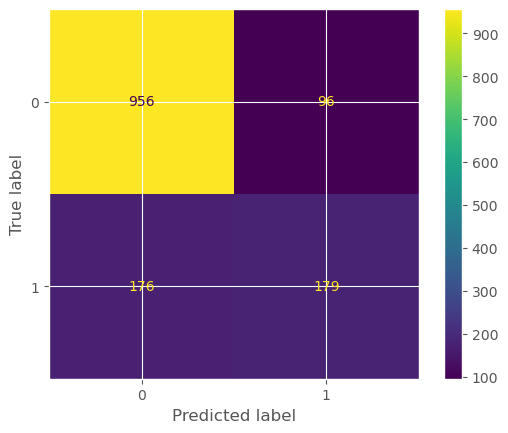

In [114]:
#get the performance of the model using by plotting the confusion metrix

plot_confusion_matrix(lg, X_test, y_test);


In [115]:
# the model's overall accuracy good (81%), but its not doing quite well on classifying data as we have a precison of 88% 
#on the No class which has more data and  65% on the yes clas which has slightly less data.
#Overall this is a good prediction but it may similarly have high bias and high variance causing overfitting.We can look into more models to check for better accuracy of low variance.

## 4.2 Decision Tree
    
 **We will build our second model off of the DecisionTreeClassifier**

In [116]:
#instantiate the model
dt = DecisionTreeClassifier(max_depth=5)


In [117]:
#fit the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [118]:
#make predictions
preds = dt.predict(X_test)

In [119]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1052
           1       0.60      0.50      0.55       355

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



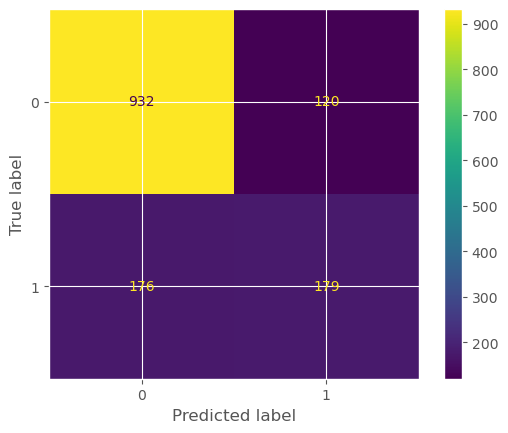

In [120]:
#get the performance of the model using by plotting the confusion metrix
plot_confusion_matrix(dt, X_test, y_test);

In [121]:
# basic decision tree model has reduced performance (79%) compared to the earlier model-the logistic regression that had an accuracy score of 81%
#We will try to use the Random Forest and see if our model performance improves

In [122]:
#we will go ahead and plot the feature importances of a decision tree
imp_feats = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

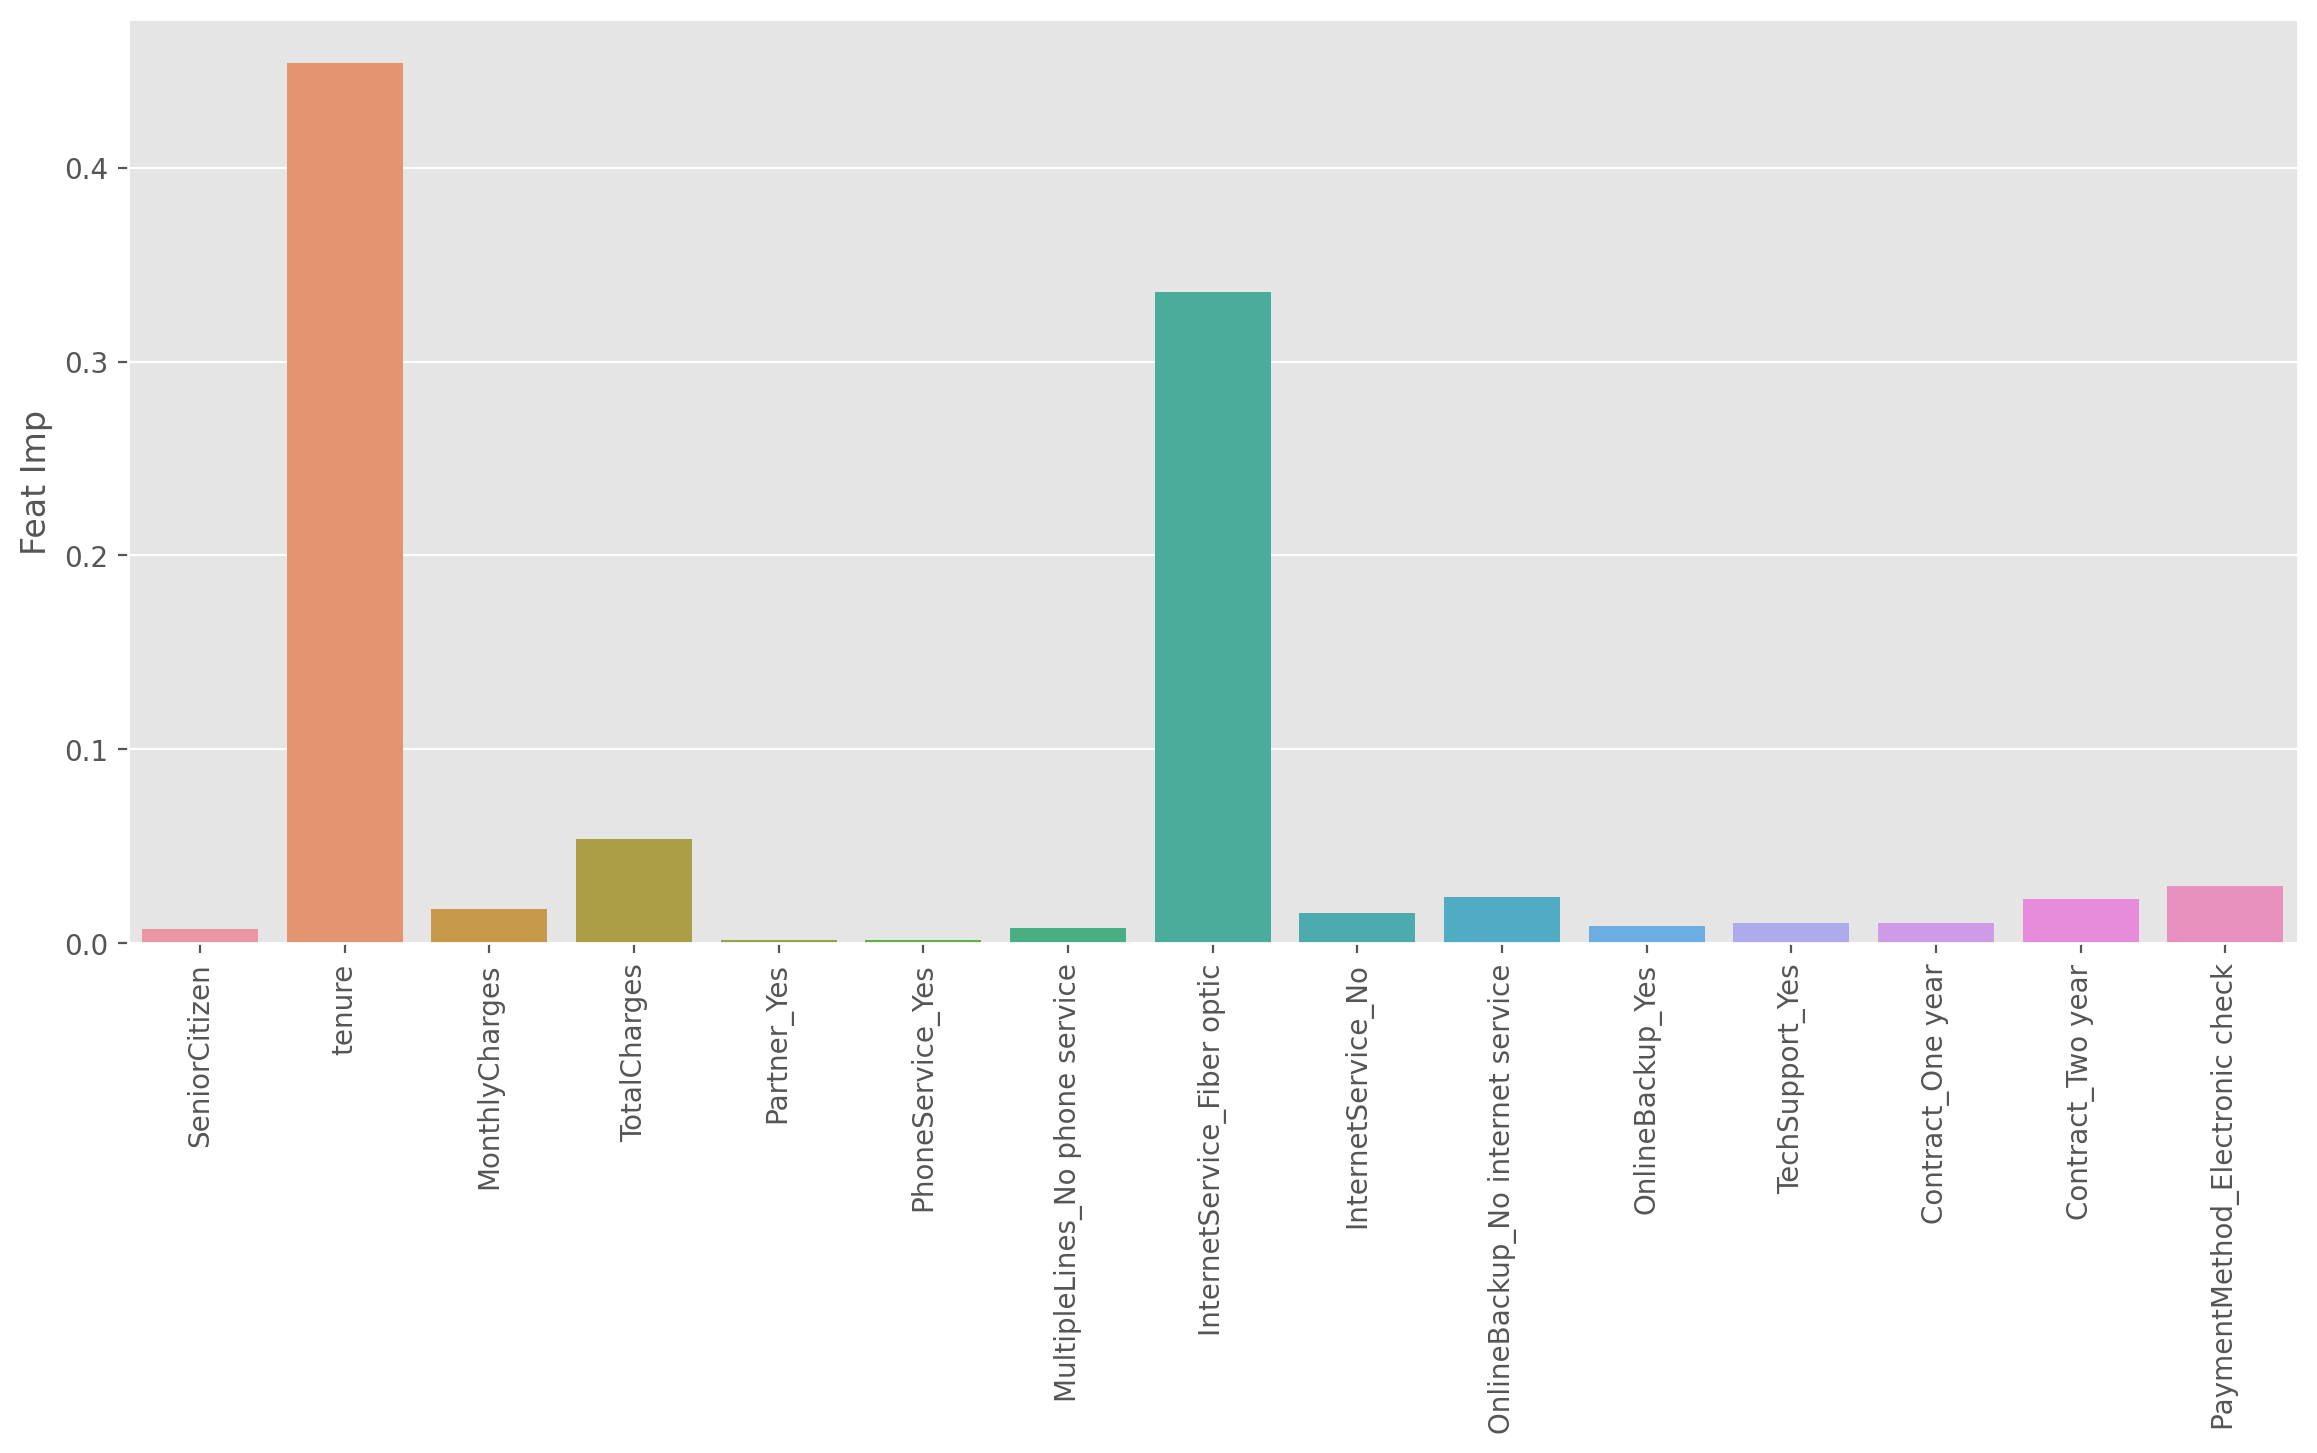

In [123]:
#sort_values in the data frama
imp_feats.sort_values('Feat Imp')
#plot features that have a weight greater than 0
imp_feats = imp_feats[imp_feats['Feat Imp']>0]
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y ='Feat Imp');
plt.xticks(rotation=90);

In [124]:
#the decision tree bases majorly on the tenure and InternetService_Fibre optic to make its predctions

## 4.3 Random Forest
Here we try to improve our second Model using a vanilla random Forest classifier

In [125]:
#instantiate the Random Forest Classifier
rf = RandomForestClassifier(random_state=42, min_samples_split = 20, max_depth=5)

In [126]:
#fit the model to the train data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=20, random_state=42)

In [127]:
#make predictions
preds = rf.predict(X_test)

In [128]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      1052
           1       0.67      0.41      0.51       355

    accuracy                           0.80      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.79      0.80      0.78      1407



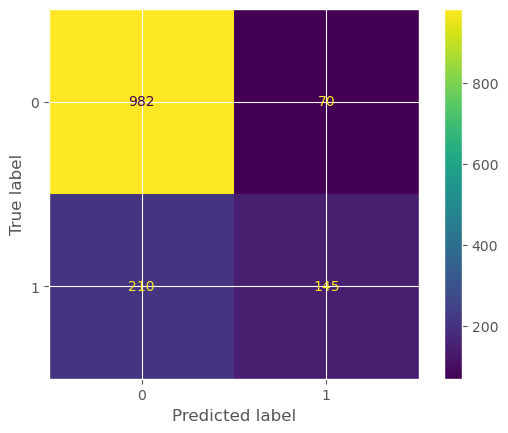

In [129]:
#get the performance of the model using by plotting the confusion metrix
plot_confusion_matrix(rf, X_test, y_test);

In [130]:
#our model is performing poorly on the recall, we are getting a lot of false negatives in as much as the overal model performace is great

In [131]:
#check important features
imp_feats = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

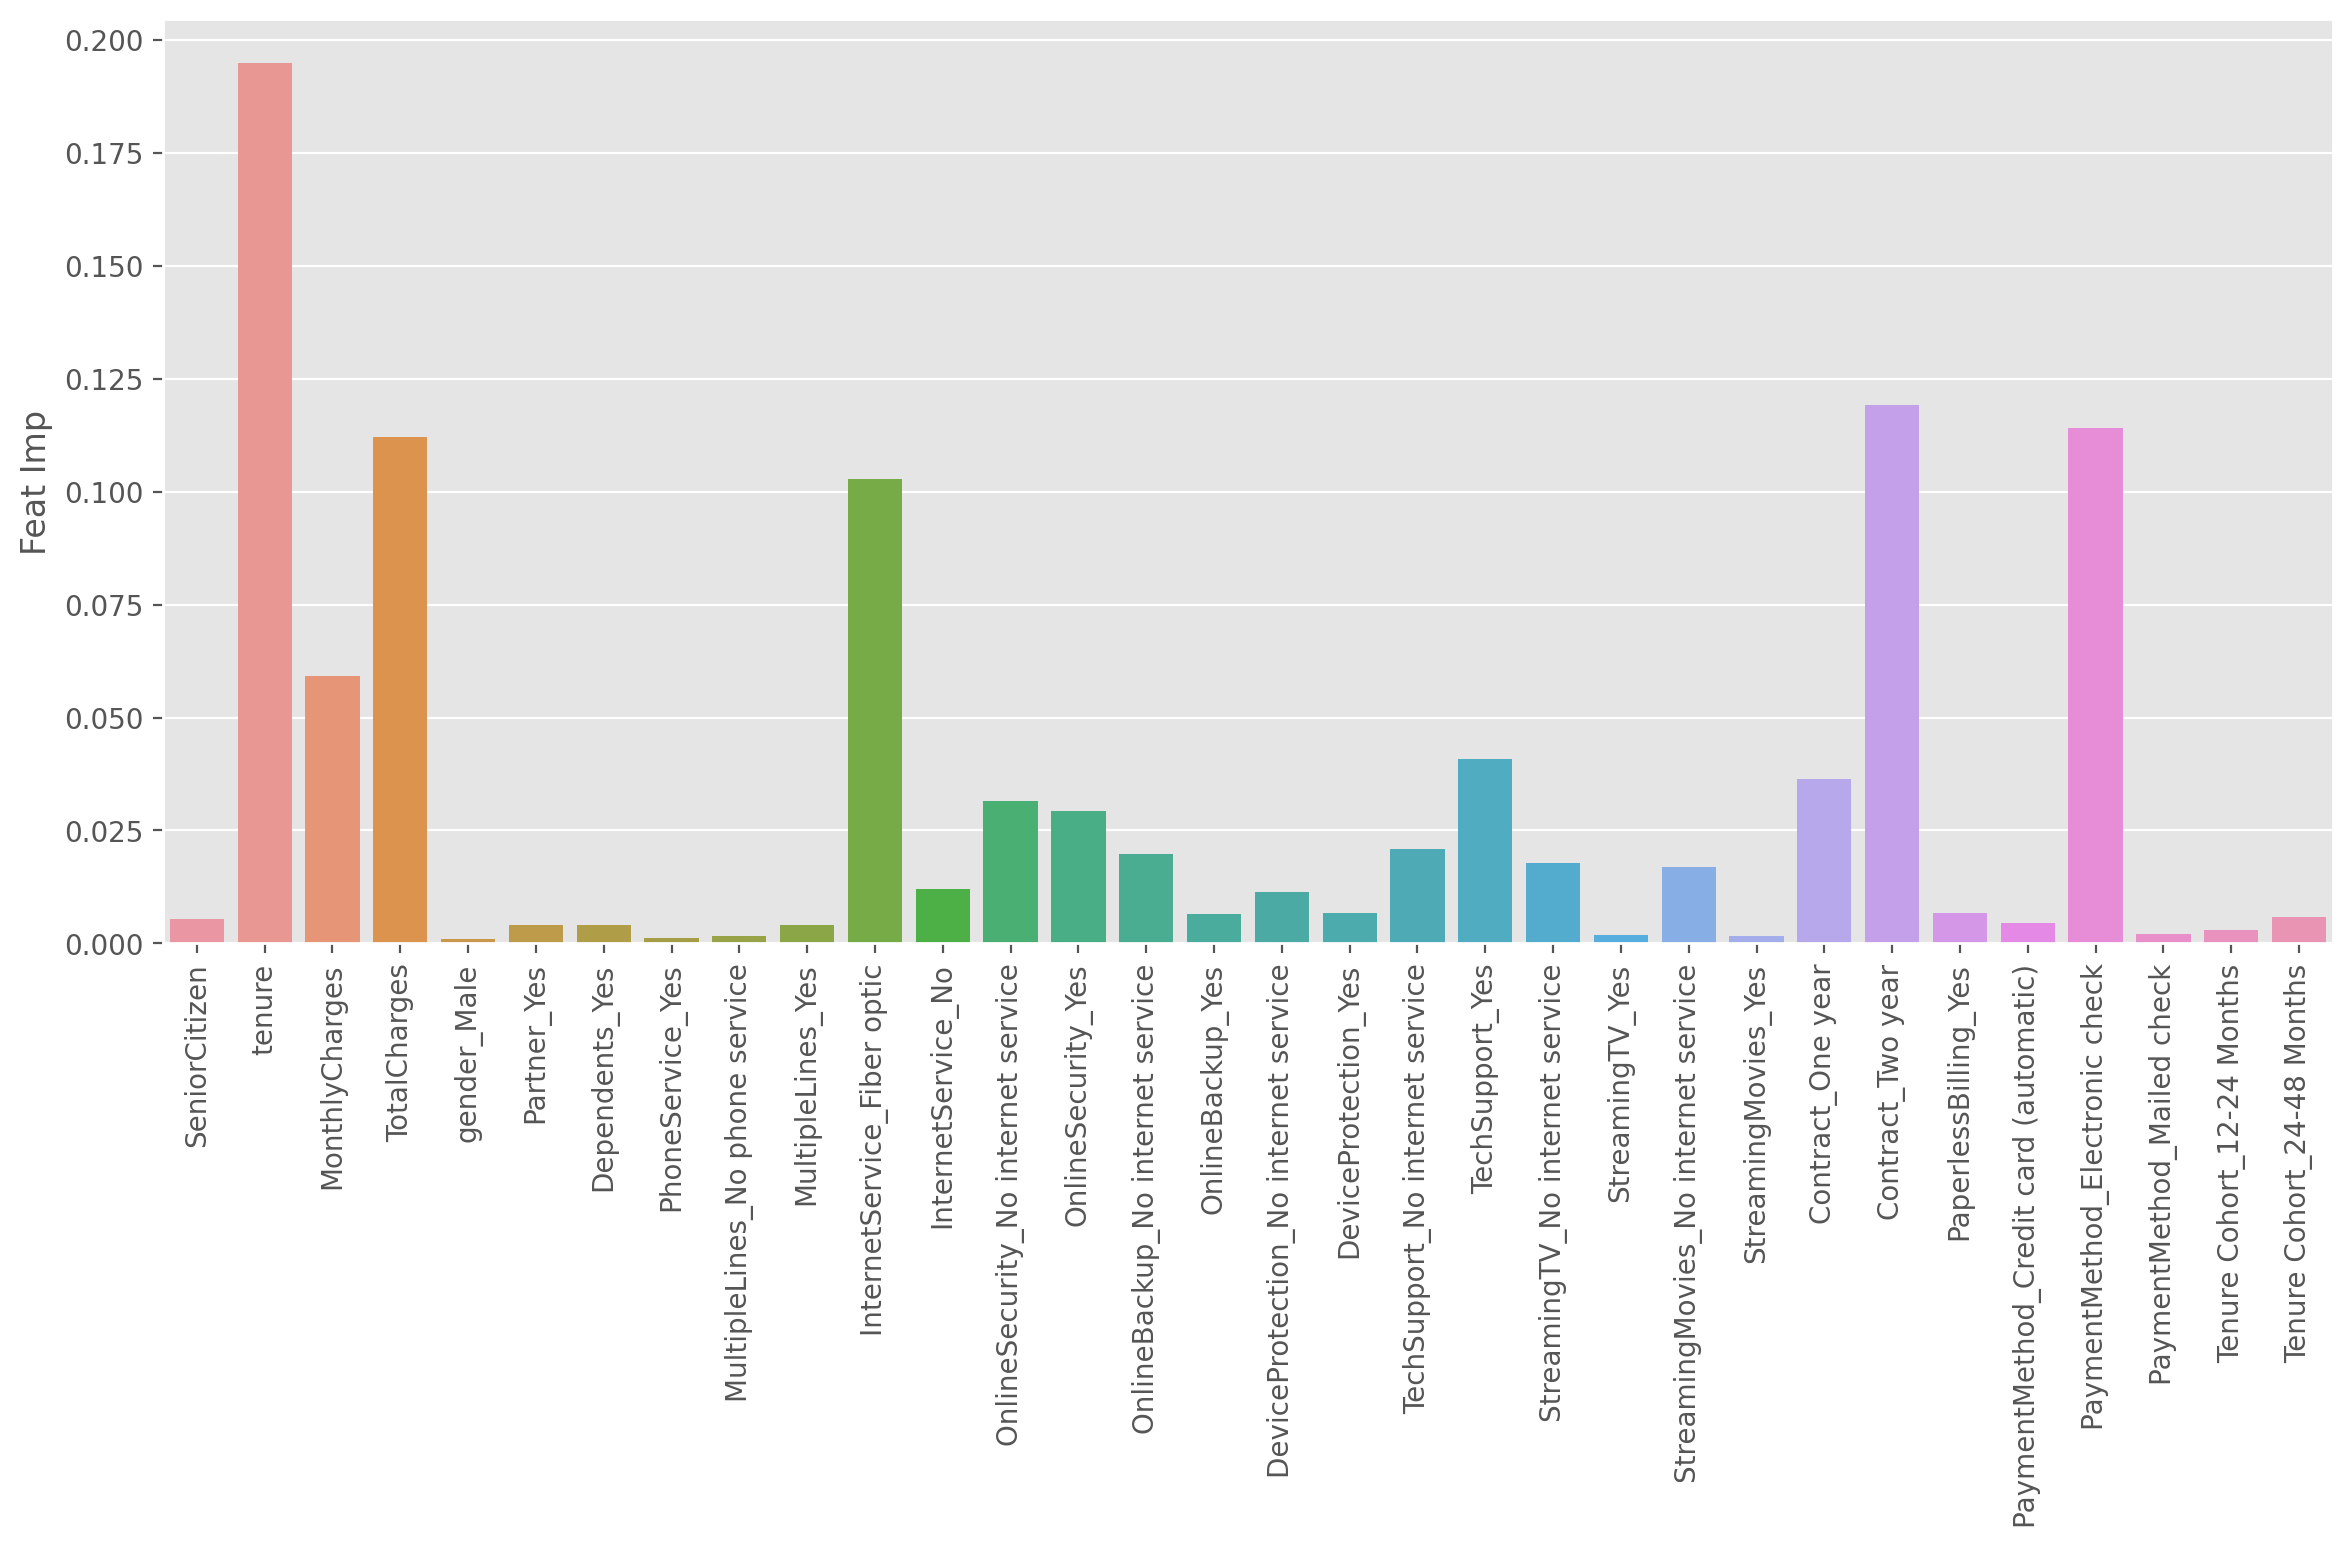

In [132]:
#sort_values in the data frame
imp_feats.sort_values('Feat Imp')
#plot features that have a weight greater than 0
imp_feats = imp_feats[imp_feats['Feat Imp']>0]
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y ='Feat Imp');
plt.xticks(rotation=90);

In [133]:
#the most important features in the dataframe according random forest classifier are :
#tenure,monthly charges, total charges, internetservice_fibre optic, tech_support, online_security, contract_type, payment method

## 4.4 AdaBoost
**Random forest didnt do quite well as it has a lot of misclassification. We venture to train and predict our data on Adaboost Model**

In [134]:
#instantiate the model
ada = AdaBoostClassifier(n_estimators=100)

In [135]:
#fit the model on the training data
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [136]:
#make predictions
preds = ada.predict(X_test)

In [137]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.64      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



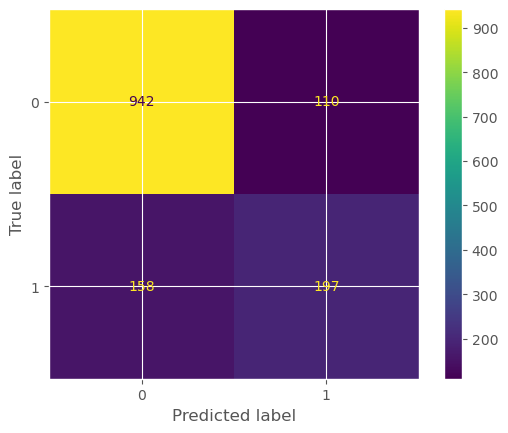

In [138]:
#get the performance of the model using by plotting the confusion metrix
plot_confusion_matrix(ada, X_test, y_test);

## 4.5 Gradient Boost

In [139]:
#instantiate the model
gb = GradientBoostingClassifier()


In [140]:
#fit the model on the trainig data
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [141]:
#Make predictions on the testdata
preds = gb.predict(X_test)

In [142]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



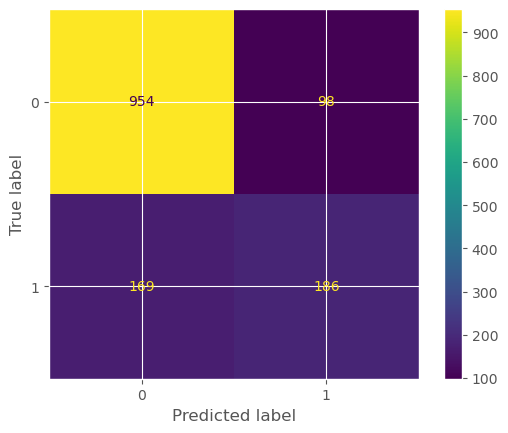

In [143]:
#get the performance of the model using by plotting the confusion metrix
plot_confusion_matrix(gb, X_test, y_test);

In [173]:
# Adaboost performed better than our baseline model, decision tree and random forest. It has an accuracy score of 84% with a recall
# score of 52% on the churn_yes class